In [171]:
import pandas as pd
import psycopg2 as pg
import numpy as np
import sys, argparse, csv
from sklearn.model_selection import train_test_split   
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [60]:
crashes = pd.read_csv('data/Airplane_Crashes_and_Fatalities_Since_1908.csv')
crashes.describe()
crashes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [172]:
s = crashes['Operator']== 'Military - U.S. Army'

        

In [82]:
aircraft = pd.DataFrame(crashes)
headers= aircraft.drop(['Flight #','Registration','Route', 'Ground','Location', 'cn/In'],axis=1)
crashed =pd.DataFrame(headers)
crashed.dropna(subset=['Time'], inplace=True)
crashed.groupby(crashed.columns, axis=1).agg(lambda x: x.apply(lambda y: ','.join([str(l) for l in y if str(l) != "nan"]), axis=1))
crashed


,Date,Time,Operator,Type,Aboard,Fatalities,Summary
0,09/17/1908,17:18,Military - U.S. Army,Wright Flyer III,2.0,1.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,Military - U.S. Navy,Dirigible,5.0,5.0,First U.S. dirigible Akron exploded just offsh...
3,09/09/1913,18:30,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,Military - German Navy,Zeppelin L-8 (airship),41.0,21.0,Crashed into trees while attempting to land af...
...,...,...,...,...,...,...,...
5261,04/29/2009,06:00,Bako Air,Boeing B-737-200,7.0,7.0,Crashed while en route on a ferrying flight. T...
5262,05/03/2009,12:00,Military - Venezuelan Army,Mi-35,18.0,18.0,The helicopter was patrolling along the Venezu...
5263,05/20/2009,06:30,Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,"While on approach, the military transport cras..."
5265,06/01/2009,00:15,Air France,Airbus A330-203,228.0,228.0,The Airbus went missing over the AtlantiOcean ...


In [150]:
crashed['Date'] = pd.to_datetime(crashed['Date'])
crashed




,Date,Time,Operator,Type,Aboard,Fatalities,Summary
0,1908-09-17,17:18,Military - U.S. Army,Wright Flyer III,2.0,1.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,06:30,Military - U.S. Navy,Dirigible,5.0,5.0,First U.S. dirigible Akron exploded just offsh...
3,1913-09-09,18:30,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,10:30,Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,Hydrogen gas which was being vented was sucked...
5,1915-03-05,01:00,Military - German Navy,Zeppelin L-8 (airship),41.0,21.0,Crashed into trees while attempting to land af...
...,...,...,...,...,...,...,...
5261,2009-04-29,06:00,Bako Air,Boeing B-737-200,7.0,7.0,Crashed while en route on a ferrying flight. T...
5262,2009-05-03,12:00,Military - Venezuelan Army,Mi-35,18.0,18.0,The helicopter was patrolling along the Venezu...
5263,2009-05-20,06:30,Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,"While on approach, the military transport cras..."
5265,2009-06-01,00:15,Air France,Airbus A330-203,228.0,228.0,The Airbus went missing over the AtlantiOcean ...


In [170]:

date_death =crashed.groupby(crashed['Date'].dt.strftime('%B'))['Fatalities'].sum().sort_values()


In [14]:
from datetime import datetime, timedelta

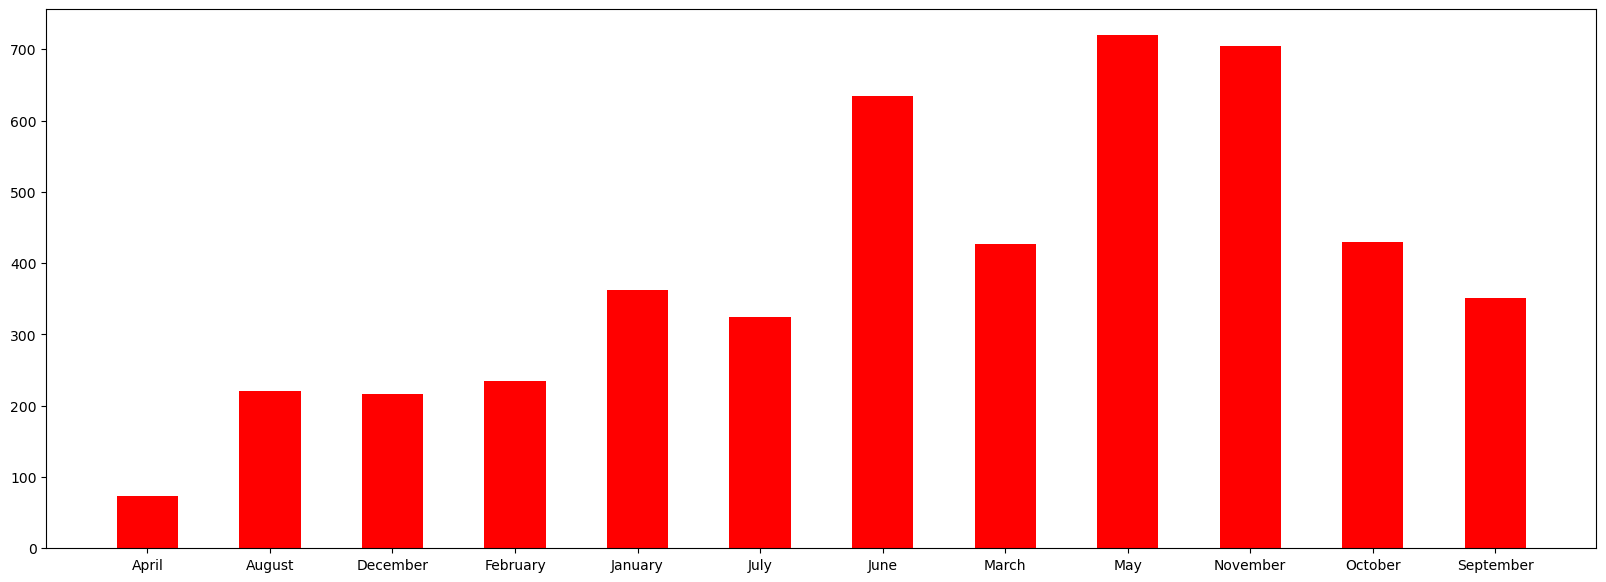

In [33]:

planes = crashed.groupby([crashed['Date'].dt.year.rename('Year'), 
                   crashed['Date'].dt.month_name().rename('Month')])['Fatalities'].sum().reset_index()
crashed.groupby(crashed['Date'].dt.strftime('%B'))['Aboard'].sum().sort_values()
# crashed.plot(x="Date", kind="bar", color=['red', 'blue','orange'],rot=90, fontsize='50',figsize = (75,50)).legend(loc='best', fontsize=80)
jet = planes.sort_values('Month')
Months = jet['Month']
Death = planes['Fatalities']
c =planes.groupby(['Month', 'Fatalities'])
fig = plt.figure(figsize =(20, 7))
plt.bar( Months,Death, color='r', width =.5)
plt.show()
